## Linear Regression - Stochastic Gradient Descent

In [51]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [52]:
data=load_boston()

In [53]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Objective:

- Here the objective of this analysis is to predict the house price

In [54]:
# Feature names 

print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [55]:
# loading to DataFrame

boston_data=pd.DataFrame(data.data,columns=data.feature_names)

In [56]:
boston_data.shape

(506, 13)

In [57]:
# Adding label to the dataframe

boston_data["Price"]=data.target

In [58]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Splitting the data into Train and Test

In [59]:
X=boston_data.drop("Price",axis=1)
Y=boston_data["Price"]

In [60]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [61]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(x_train)/len(X)*100,'%\n','size:',len(x_train))

print('Test dataset:',len(x_test)/len(X)*100,'%\n','size:',len(x_test))

Split ratio
--------------------------------------------------
Train dataset: 79.84189723320159 %
 size: 404
Test dataset: 20.158102766798418 %
 size: 102


In [62]:
print("train data shape (x_train,y_train)")
print("(",x_train.shape,",",y_train.shape,")")
print("test data shape (x_test,y_test)")
print("(",x_test.shape,",",y_test.shape,")")

train data shape (x_train,y_train)
( (404, 13) , (404,) )
test data shape (x_test,y_test)
( (102, 13) , (102,) )


## Stochastic Gradient Descent (SGD) Algorithm implementation

In [63]:
# Data standardization
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
data_std=StandardScaler()
x_train_std=data_std.fit_transform(x_train)
x_test_std=data_std.transform(x_test)

#### SGD Working Principle:

-    Randomly choose w and b
-    Initialize the learning rate and iteration
-    Pick a random set of k points for every iteration, where 1≤𝑘≥𝑛

- Update gradient for each iteration
- Run a loop untill obtain the minimum w and b

### Creating Function for SGD

In [64]:
#Citations:
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/function-arguments/
# https://www.geeksforgeeks.org/functions-in-python/
# https://www.geeksforgeeks.org/g-fact-41-multiple-return-values-in-python/

# Reference for To Generate the random values
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html

In [65]:
# References To generate the the random w and b using Normal Distribution
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html

# References To produce the same set of random values in the Normal distribution
# https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

# References for SGD Regeressor Implementation
# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
# http://mccormickml.com/2014/03/04/gradient-descent-derivation/
# https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
# https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/ 
# https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/
# https://medium.com/@lachlanmiller_52885 
  #/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd
# https://scikit-learn.org/stable/modules/sgd.html.
# https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

# Reference for tqdm 
# https://pypi.org/project/tqdm/

In [66]:
# Function for creating a k sample for each iteration:

def k_sample(**para):
    
    k_sample_x=[]
    k_sample_y=[]
    
    sample=np.random.randint(0,354,size=para["sample_size"])
    
    fi=para["train_data"]
    la=para["train_label"].values

    for i in sample:
        
        a= list(fi[i])
        b=la[i]
        
        k_sample_x.append(a)
        k_sample_y.append(b)
        
    k_sample_x=np.asarray(k_sample_x)
    k_sample_y=np.asarray(k_sample_y)
    k_sample_y=np.reshape(k_sample_y,(para["sample_size"],1))
    
    return k_sample_x,k_sample_y

In [67]:
# Fuction for finding optimal w , b, mse and cost_list Using Stochastic Gradient Descent Optimization (SGD) Algorithm.

def optimal_w_b(**para):

    # Initializing
    
    size_w = para["train_data"].shape[1]
    np.random.seed(20)
    w = np.random.normal(loc=0,scale=1,size=size_w)
    w = np.reshape(w,(1,size_w))
    b=float(np.random.normal(loc=0,scale=1,size=1))
    r=0.001
    
    w_list = []
    b_list = []
    cost_list = []
    value=para["iteration"]
    
    # Loop for getting a optimul w and b using n iterations

    for i in tqdm(range(0,value)):
    
        # k samples produces for each iteration
        
        k_sample_x,k_sample_y=k_sample(sample_size=para["sample_size"],train_data=para["train_data"],\
                                       train_label=para["train_label"])
    
        n= k_sample_y.shape[0]
    
       
        # Initialization to store the values
        
        grad_w = np.zeros((1,size_w))
        grad_b = 0
        cost = 0
        
        # Loop for produce the error and cost fuction 
        
        for x,y in zip(k_sample_x,k_sample_y):
        
            x=np.reshape(x,(1,size_w))
        
            y=float(y)
        
            pred = np.dot(x,w.T) + b 
        
            error = y - pred
        
            grad_w = grad_w + (x * error)
        
            grad_b = grad_b + (error)
        
            cost = cost + ((error)**2)
        
        dl_dw = (-2/n) * grad_w
    
        dl_db = (-2/n) * grad_b
    
        cost_value = (1/n) * (cost)
    
        w = w - ( r * dl_dw)
    
        b = b - (r * dl_db)
    
        # Storing w and b which will get each iterations
        
        w_list.append(w)
        b_list.append(b)
        cost_list.append(float(cost_value))
        
    # Optimal w,b,mse
    
    w_optimum=np.asarray(w_list[-1])
    w_optimum= w_optimum[0]
    b_optimum =np.asarray(b_list[-1])
    b_optimum = float(b_optimum)
    mse = np.asarray(cost_list[-1])
    mse=float(mse)
    
    # Function Return values (w,b,mse,cost_list)
    
    return w_optimum,b_optimum,mse,cost_list

In [68]:
# Fuction for Predict the test data using optimal w,b

def SGD_Regressor_custom(**para):
    
    # list to store the predicted value
    
    pred_list =[]
    cost=0
    w=para["optimal_w"]
    b=para["optimal_b"]
    
    # loop for Predict the test data using optimal w and b
    
    for x,y in zip(para["test_data"],para["test_label"]):
        
        size = para["test_data"].shape[1]
        
        n= para["test_data"].shape[0]
        
        x=np.reshape(x,(1,size))
        
        y=float(y)
        
        pred = np.dot(x,w.T) + b
        
        error = y - pred
        
        # MSE
        
        cost = cost + ((error)**2)
        
        pred_list.append(float(pred))
        
    mse = (1/n) * (cost)
    
    predict_value = np.asarray(pred_list)
    
    # Return predicted values
    
    return predict_value,float(mse)

In [69]:
# Finding optimal w,b,mse and cost_list

w_optimum,b_optimum,mse_train,cost_list=optimal_w_b(iteration=2000,sample_size=20,train_data=x_train_std,train_label=y_train)

100%|██████████| 2000/2000 [00:00<00:00, 4570.24it/s]


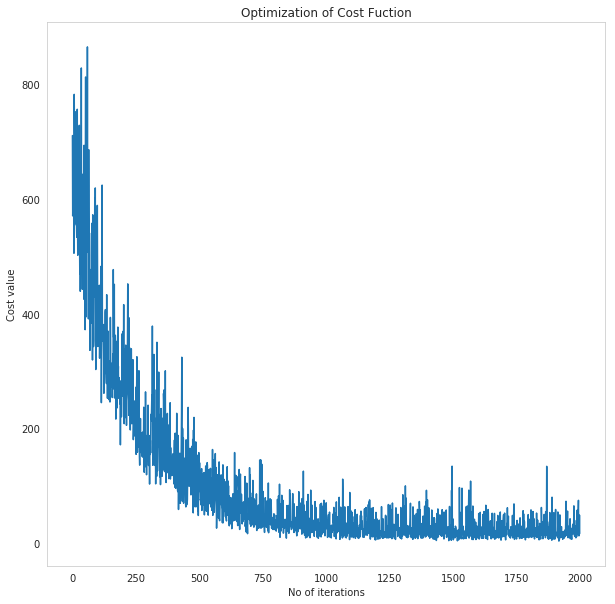

In [70]:
# Plotting cost values for each iteration

plt.close()
plt.figure(figsize=(10,10))
plt.plot(range(0,2000),cost_list)
plt.grid()
plt.xlabel("No of iterations")
plt.ylabel("Cost value")
plt.title("Optimization of Cost Fuction")
plt.show()

#### Observation:

-    If the number of iteration increases, The MSE (Cost) reduces.



In [71]:
# Predict the test data using manually optimized w and b

y_custom,mse=SGD_Regressor_custom(optimal_w=w_optimum,optimal_b=b_optimum,test_data=x_test_std,test_label=y_test)

In [72]:
print(" the Optimal weight vector of manually implemented SGD")
print("="*125)
print(w_optimum)
print(" ")
print(" the Optimal y intercept of manually implemented SGD")
print("="*125)
print(b_optimum)
print(" ")
print("The mse value of manually implemented SGD")
print("="*125)
print(mse)

 the Optimal weight vector of manually implemented SGD
[-0.77812515  0.40610261 -0.27094832  0.98905431 -1.40834991  2.89629074
  0.64666167 -2.14462645  1.23314931 -0.4524809  -1.79102283  0.73413303
 -4.31336998]
 
 the Optimal y intercept of manually implemented SGD
22.035944435479514
 
The mse value of manually implemented SGD
21.770055179819852


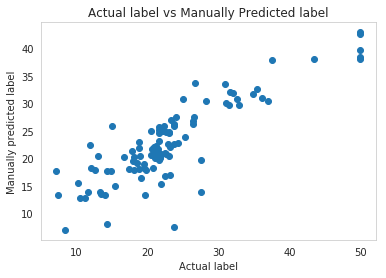

In [73]:
# Plot for actual values vs manually predicted values

plt.close()
plt.scatter(y_test,y_custom)
plt.grid()
plt.title("Actual label vs Manually Predicted label")
plt.xlabel("Actual label")
plt.ylabel("Manually predicted label")
plt.show()

In [74]:
delta = y_test - y_custom

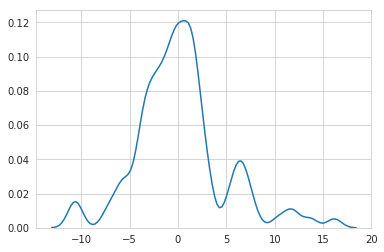

In [75]:
# Plotting the error difference (delta)
import seaborn as sns
plt.close()
sns.set_style("whitegrid")
sns.kdeplot(np.array(delta),bw=.75)
plt.show()

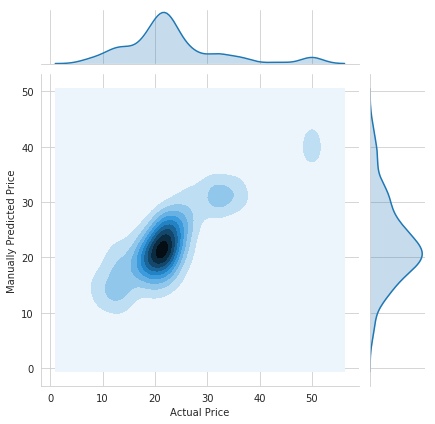

In [76]:
plt.close()
sns.set_style("whitegrid")
fig=sns.jointplot(x=y_test,y=y_custom,kind="kde")
fig.set_axis_labels('Actual Price', 'Manually Predicted Price')
plt.show()

### Observation:

-  Maximum number of actual and predicted price points lie between 15 to 35 


### Implementation of Stochastic Gradient Descent (SGD) Algorithm using Sklearn

In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Fitting a data to find optimal w and b

model = SGDRegressor(max_iter=2000)
model.fit(x_train_std,y_train)
w_sklearn=model.coef_
b_sklearn=model.intercept_

In [78]:
# Predicting using sklearn model

y_sklearn = model.predict(x_test_std)
mse_sklearn = mean_squared_error(y_test,y_sklearn)

In [79]:
print(" the Optimal weight vector of sklearn implemented SGD")
print("="*125)
print(w_sklearn)
print(" ")
print(" the Optimal y intercept of sklearn implemented SGD")
print("="*125)
print(b_sklearn)
print(" ")
print("The mse value of sklearn implemented SGD")
print("="*125)
print(mse_sklearn)

 the Optimal weight vector of sklearn implemented SGD
[-0.89026351  1.09447669  0.22292746  0.79080819 -2.07301744  2.5906061
  0.4253591  -3.0260349   2.83140261 -2.26526786 -1.74512239  0.82982324
 -4.10515481]
 
 the Optimal y intercept of sklearn implemented SGD
[ 22.39845869]
 
The mse value of sklearn implemented SGD
20.6974994652


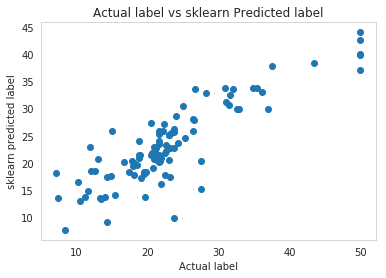

In [80]:
# Plot for actual values vs sklearn predicted values

plt.close()
plt.scatter(y_test,y_sklearn)
plt.title("Actual label vs sklearn Predicted label")
plt.xlabel("Actual label")
plt.ylabel("sklearn predicted label")
plt.grid()
plt.show()

In [81]:
delta= y_test - y_sklearn

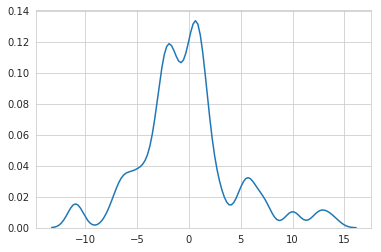

In [82]:
# Plotting the error difference (delta)

plt.close()
sns.set_style("whitegrid")
sns.kdeplot(np.array(delta),bw=.75)
plt.show()

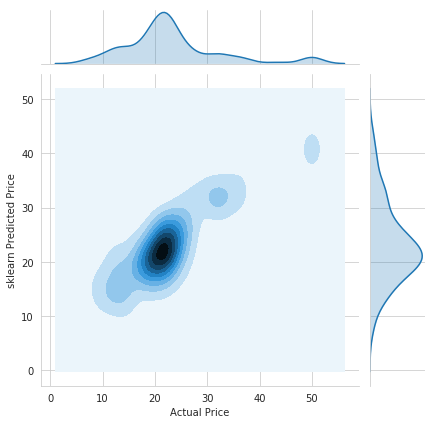

In [83]:
plt.close()
sns.set_style("whitegrid")
fig=sns.jointplot(x=y_test,y=y_sklearn,kind="kde")
fig.set_axis_labels('Actual Price', 'sklearn Predicted Price')
plt.show()

### Observation:
- Maximum number of actual and predicted price points lie between 15 to 35 

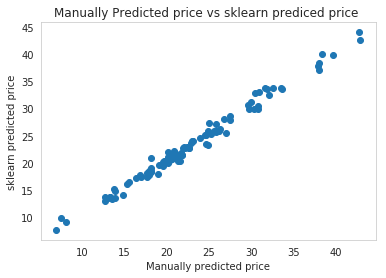

In [84]:
plt.close()
plt.scatter(y_custom,y_sklearn)
plt.grid()
plt.title("Manually Predicted price vs sklearn prediced price ")
plt.xlabel("Manually predicted price")
plt.ylabel("sklearn predicted price")
plt.show()

### Observation:
- The predicted price from sklearn's implentation is almost the same as the previous one

### Comparing the values of both implementations using PrettyTable

In [85]:
# References
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable



In [86]:
x=PrettyTable()

print("Weight vector Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
x.add_column("w_number",[1,2,3,4,5,6,7,8,9,10,11,12,13])
x.add_column("Own implemented SGD",w_optimum)
x.add_column("Sklearn implemented SGD",w_sklearn)
print(x)
print(" ")

y=PrettyTable()
print("Intercept term Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
y.field_names = ["Own implemented SGD","Sklearn implemented SGD"]
y.add_row([b_optimum,float(b_sklearn)])
print(y)
print(" ")

z=PrettyTable()
print("Mean Squared Error (MSE) Comparision of Both Own and sklearn SGD")
print("="*125)
print(" ")
z.field_names = ["Own implemented SGD","Sklearn implemented SGD"]
z.add_row([mse,mse_sklearn])
print(z)

Weight vector Comparision of Both Own and sklearn SGD
 
+----------+---------------------+-------------------------+
| w_number | Own implemented SGD | Sklearn implemented SGD |
+----------+---------------------+-------------------------+
|    1     |   -0.778125145726   |     -0.890263508549     |
|    2     |    0.406102605601   |      1.09447669092      |
|    3     |   -0.270948320162   |      0.222927458718     |
|    4     |    0.989054307482   |      0.790808188879     |
|    5     |    -1.40834990997   |      -2.07301744028     |
|    6     |    2.89629073637    |      2.59060610495      |
|    7     |     0.6466616709    |      0.425359102891     |
|    8     |    -2.14462644854   |      -3.02603490068     |
|    9     |    1.23314930667    |      2.83140261256      |
|    10    |   -0.452480897221   |      -2.26526786366     |
|    11    |    -1.7910228284    |      -1.74512238906     |
|    12    |    0.734133029915   |      0.829823236114     |
|    13    |    -4.3133699847